In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [7]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('pt_electron')
    scalar.append('pt_jet')
    scalar.append('phi_photon')
    scalar.append('phi_jet')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [8]:
file1 = ["$HOME/EIC/output/102.root"]
a = getData(file1)
file2 = ["$HOME/EIC/output/1226.root"]
b = getData(file2)


Processed $HOME/EIC/output/102.root in 33.3 seconds

Processed $HOME/EIC/output/1226.root in 27.7 seconds


In [9]:
a1 = applyCut(a, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
a1 = applyCut(a1, 'Q2 > 25', 'Q2 > 25')
a1 = fixPhi(a1, 'photon')
a1 = applyCut(a1, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')
a2 = keepOneJet(a1)

b1 = applyCut(b, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
b1 = applyCut(b1, 'Q2 > 25', 'Q2 > 25')
b1 = fixPhi(b1, 'photon')
b1 = applyCut(b1, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')
b2 = keepOneJet(b1)

0.1 < y < 0.85 6783540  fraction kept: 18.7
Q2 > 25 785883  fraction kept: 11.6
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 220056  fraction kept: 28.0

Remove extra jets 146644  fraction kept: 66.6
0.1 < y < 0.85 5699421  fraction kept: 16.5
Q2 > 25 1000377  fraction kept: 17.6
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 277785  fraction kept: 27.8

Remove extra jets 185695  fraction kept: 66.8


In [10]:
xvar_array = toArrayFloat(0.69, 1.60, 0, log=True, logNum=11)
xseca = np.mean(a['xsec'])
ntrialsa = a['ntrials'][a.shape[0]-1]
xa1, ya1, xerr = getHist(a1, 'pt_jet', xvar_array)
xa2, ya2, xerr = getHist(a2, 'pt_electron', xvar_array)

In [11]:
xsecb = np.mean(b['xsec'])
ntrialsb = b['ntrials'][b.shape[0]-1]
xb1, yb1, xerr = getHist(b1, 'pt_jet', xvar_array)
xb2, yb2, xerr = getHist(b2, 'pt_electron', xvar_array)

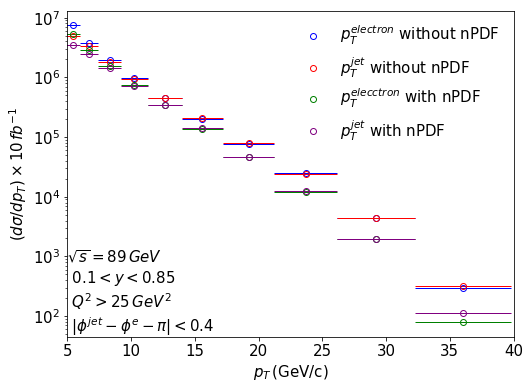

In [31]:
fig = plt.figure(figsize=(8,6))
plt.errorbar(xa2, 10*ya2*xseca*1e12/(2*ntrialsa*xerr), xerr = xerr, fmt='none', color='b', elinewidth=1)
plt.plot(xa2, 10*ya2*xseca*1e12/(2*ntrialsa*xerr), 'bo', fillstyle='none', label='$p_T^{electron}$ without nPDF')
plt.errorbar(xa1, 10*ya1*xseca*1e12/(2*ntrialsa*xerr), xerr = xerr, fmt='none', color='r', elinewidth=1)
plt.plot(xa1, 10*ya1*xseca*1e12/(2*ntrialsa*xerr), 'ro', fillstyle='none', label='$p_T^{jet}$ without nPDF')
plt.errorbar(xb2, 10*yb2*xsecb*1e12/(2*ntrialsb*xerr), xerr=xerr, fmt='none', color='g', elinewidth=1)
plt.plot(xb2, 10*yb2*xsecb*1e12/(2*ntrialsb*xerr), 'go', fillstyle='none', label='$p_T^{elecctron}$ with nPDF')
plt.errorbar(xb1, 10*yb1*xsecb*1e12/(2*ntrialsb*xerr), xerr=xerr, fmt='none', color='purple', elinewidth=1)
plt.plot(xb1, 10*yb1*xsecb*1e12/(2*ntrialsb*xerr), color='purple', marker='o', linewidth=0, fillstyle='none', label='$p_T^{jet}$ with nPDF')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('$p_T \, (\mathrm{GeV/c})$', fontsize=15)
plt.ylabel(r'$(d\sigma/dp_T) \times 10 \, fb^{-1}$', fontsize=15)
plt.xlim(left=5, right=40)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.text(5,50,'$\sqrt{s} = 89 \, GeV$ \n $0.1 < y < 0.85$ \n $Q^2 > 25 \, GeV^2$ \n $|\phi^{jet} - \phi^e - \pi|<0.4$',\
        fontsize=15)
plt.savefig('images/nPDF_all.pdf', bbox_inches='tight')